In [1]:
# Show ALL outputs in cell, not only last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
relative_filepath = "../../"

In [3]:
# Set relative path mapping for module imports
import sys

sys.path.append(relative_filepath)

#for path in sys.path:
#    print(path)

In [4]:
# External Dependencies
import numpy as np
import pandas as pd

In [5]:
# Read in pickled combined data
X_y_data = pd.read_pickle(relative_filepath + "data/interim/X_y_data.pkl")
X_combined = pd.read_pickle(relative_filepath + "data/interim/X_combined.pkl")
y_combined = pd.read_pickle(relative_filepath + "data/interim/y_combined.pkl")

# Read in pickled train data
X_y_train = pd.read_pickle(relative_filepath + "data/interim/X_y_train.pkl")
X_train = pd.read_pickle(relative_filepath + "data/interim/X_train.pkl")
y_train = pd.read_pickle(relative_filepath + "data/interim/y_train.pkl")

# Read in pickled test data
X_y_test = pd.read_pickle(relative_filepath + "data/interim/X_y_test.pkl")
X_test = pd.read_pickle(relative_filepath + "data/interim/X_test.pkl")
y_test = pd.read_pickle(relative_filepath + "data/interim/y_test.pkl")

In [6]:
# Recap data structure
X_y_data.head()
X_y_data.shape

target = "classLabel"

input_dfs = [X_y_data,
             X_combined,
             X_y_train,
             X_train,
             X_y_test,
             X_test]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,"17,92","5,4e-05",u,"-0,840182024985552","0,522882590622095","1,75",f,t,1,t,g,80.0,5,800000,t,0,no.
1,b,"16,92","3,35e-05",y,"-2,15963506605476","0,774187133555115","0,29",f,f,0,f,s,200.0,0,2e+06,NaN,0,no.
2,b,"31,25","0,0001125",u,"1,75068668089807","0,76036270650308",0,f,t,1,f,g,96.0,19,960000,t,0,no.
3,a,"48,17","0,0001335",u,"4,17487068567425","0,888963139486792","0,335",f,f,0,f,g,0.0,120,0,NaN,0,no.
4,b,"32,33","0,00035",u,"-3,78547915257514","0,489023844085239","0,5",f,f,0,t,g,232.0,0,2.32e+06,f,0,no.


(3900, 18)

## Manual Bespoke EDA

In [ ]:
0. Questions To Ask Before You Download the Data
I called this one step 0 because it happens before you import data into Python. 
It’s easy to forget, but if you can answer these questions it can save you a lot of time and frustration down the road.
How was this data collected/where did it come from?
Why am I interested in this data?
What would be the target variable of interest? (if applicable)
Is this data from a reputable source?
Is there enough data here to make an ML model?
Have other people conducted a similar analysis/modeling project on this dataset? Do I want to be able to learn from their conclusions or create a novel project?
Is there a data dictionary for the dataset? Is it complete?
Are there any additional challenges or problems that I anticipate if I use this data?
It’s helpful to use these questions like a filter when you have a choice on what dataset to use.
It’s really tough to realize halfway through a project that you picked a bad dataset.

In [ ]:
1. Data Structure & Distributions

In [ ]:
X_y_data.shape
X_y_data.info()

In [ ]:
Questions to answer:
How many features do you have?
How many observations do you have?
What is the data type of each feature?
From what you know about the features of your dataset, do the data types make sense? Do you need to change any?
Example: Your data has a Customer ID number for every row, and each number is five digits long, stored as an integer. You will not ever be aggregating or analyzing the Customer ID like an integer, so you should change it to the “object” data type.
Do you have null values? (to be fixed later)
How much memory does this dataset use? Could this pose a problem for you later on?


In [ ]:
X_y_data.hist(figsize=(15,15)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

In [ ]:
Questions to answer:
What is the distribution of each variable?
Do there appear to be outliers? (to be fixed later)
Think about what the variables mean and what the histograms say about their values and their spread — are there any surprises?

In [ ]:
X_y_data.describe()

In [ ]:
X_y_data.describe(include='all').T

In [ ]:
Questions to answer:
Are the max/min values reasonable for the variables? Do you see any values that look like errors?
What is the mean for each variable? What do the means tell you about your dataset as a whole?

In [ ]:
2. Null Values & Duplicates


In [ ]:
X_y_data.duplicated().sum()

In [ ]:
#X_y_data.drop_duplicates(inplace=True)

In [ ]:
null = df.isna().sum()/len(df)
null[null > 0].sort_values()

In [ ]:
Questions to answer:
Is the null value a result of the way data was recorded?
Example: Survey response data is recorded in columns as “yes”, “no,” and a null value for “prefer not to answer.” In this case, all nulls can be filled in with a single value like “no answer.”
Can you drop the rows with null values without it significantly affecting your analysis?
Looking at the distributions of the variables, can you justify filling in the missing values with the mean or median for that variable?
Be careful! You have to deal with missing values somehow, but sometimes it is better to drop rows rather than tinker with the original data because if you put bad data into a model you cannot get meaningful results.
If your data is time-series data, can you fill the missing values with interpolation?
Are there so many missing values for a variable that you should drop that variable from your dataset?

In [ ]:
3. Outliers

In [ ]:
continuous_labels = list(continuous.columns)
i = 1
plt.figure(figsize=(15,30))
for var in continuous_labels: #plotting boxplot for each variable
   plt.subplot(round(len(continuous_labels),0)/3+3,4,i)
   plt.boxplot(continuous[var],whis=5)
   plt.title(var)
   i+=1
plt.tight_layout()
plt.show()

In [ ]:
Questions to ask:
Do you have outliers (represented as dark circles on the boxplots) in your variables?
Why do you think you have outliers?
Do the outliers represent real observations (i.e. not errors)?
Should you exclude these observations? If not, should you winsorize the values?

This is a tricky question. I typically identify my outliers and then I leave them be until I have tried out some models. 
If I find the models have low accuracy, I will go back and re-evaluate whether I should winsorize the variable(s) with outliers (if I have no other options).

In [ ]:
4. Correlations/Relationships

In [ ]:
df.corr()

In [ ]:
Questions to ask:
Which variables are most correlated with your target variable? (If applicable)
Is there multicollinearity? (Two features that have a correlation > 0.8) How will this affect your model?
Do you have variables that represent the same information? Can one be dropped?

In [ ]:
5. Feature Engineering

In [ ]:
Variable Transformation

In [ ]:
The most common transformation is one-hot-encoding to transform categorical variables into numeric — binary, to be specific — variables. 
This is necessary because machine learning models cannot handle “object” data types. Pandas makes this easy to do:

new_df = pd.get_dummies(df,drop_first=True)

In [ ]:
Another common transformation (which is necessary for some models) is standardizing variables. 
Here is the code for that:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
Finally, you may want to transform variables so that they follow a normal distribution, depending on the model you are using. 
For this, you can try np.log() , np.sqrt() , the box-cox transformation, and other functions to transform your data to better fit a normal distribution.

In [ ]:
Creating New Features
This is the hardest section and requires the most critical thinking, in my opinion. 
There isn’t any code I can give that will apply to lots of projects — it really depends on the dataset.
Here are a couple of cases where you may want to try creating a new feature:
You suspect that the relationship of an outcome and a feature depends on a second feature → Create an interaction variable
You want to create linear relationships → Create quadratic or higher level functions
You can think of variables/information that is missing from your dataset → Create this variable using a function of variables you do have

In [8]:
import seaborn as sns

In [ ]:
pairplot_vars = ['mean radius', 'mean texture']

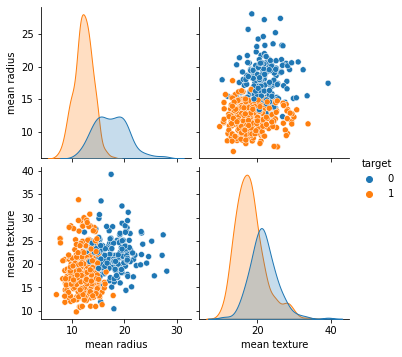

In [19]:
# Pairplot scatter
sns.pairplot(X_y_data,
             vars = pairplot_vars,
             hue = target,
             diag_kind = 'kde')